# Stroke Prediction Using Machine learning (ML) 

[week-04]

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

C:\Users\Asus\anaconda3\envs\ML\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA EXPLORATION

In [2]:
#loading the csv data to a Pandas DataFrame
brain_stroke = pd.read_csv('full_data_brain.csv')

In [18]:
# Y-data profiling
profile = pp.ProfileReport(brain_stroke, title = "Data Exploration")
profile.to_file("output.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.38it/s]


In [3]:
# print first five rows of the dataframe
brain_stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
#number of rows and columns in the dataset
brain_stroke.shape

(5026, 11)

In [5]:
brain_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5026 non-null   object 
 1   age                5026 non-null   float64
 2   hypertension       5026 non-null   int64  
 3   heart_disease      5026 non-null   int64  
 4   ever_married       5026 non-null   object 
 5   work_type          5026 non-null   object 
 6   Residence_type     5026 non-null   object 
 7   avg_glucose_level  5026 non-null   float64
 8   bmi                5026 non-null   float64
 9   smoking_status     5026 non-null   object 
 10  stroke             5026 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 432.1+ KB


In [49]:
brain_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
brain_stroke.duplicated().sum()

0

# ***Data Visualization***

## Value Count

In [51]:
brain_stroke['gender'].value_counts()

Female    2948
Male      2078
Name: gender, dtype: int64

In [52]:
brain_stroke['hypertension'].value_counts()

0    4528
1     498
Name: hypertension, dtype: int64

In [53]:
brain_stroke['heart_disease'].value_counts()

0    4737
1     289
Name: heart_disease, dtype: int64

In [11]:
brain_stroke['ever_married'].value_counts()

Yes    3348
No     1678
Name: ever_married, dtype: int64

In [12]:
brain_stroke['work_type'].value_counts()

Private          2893
Self-employed     824
children          659
Govt_job          650
Name: work_type, dtype: int64

In [13]:
brain_stroke['Residence_type'].value_counts()

Urban    2559
Rural    2467
Name: Residence_type, dtype: int64

In [14]:
brain_stroke['smoking_status'].value_counts()

never smoked       1886
Unknown            1486
formerly smoked     888
smokes              766
Name: smoking_status, dtype: int64

In [15]:
brain_stroke['stroke'].value_counts()

0    4572
1     454
Name: stroke, dtype: int64

## CountPlot

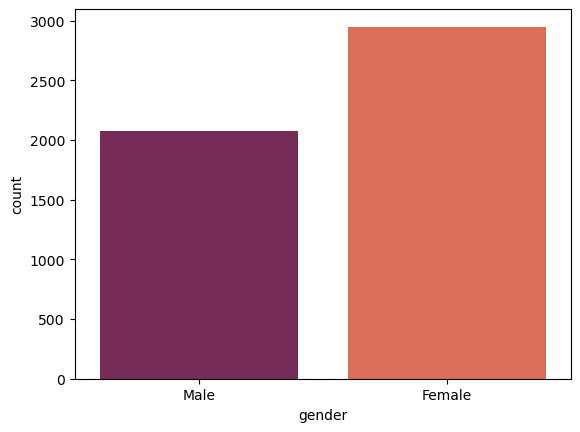

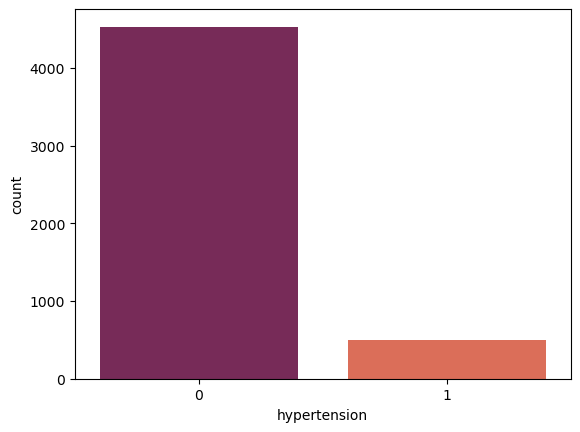

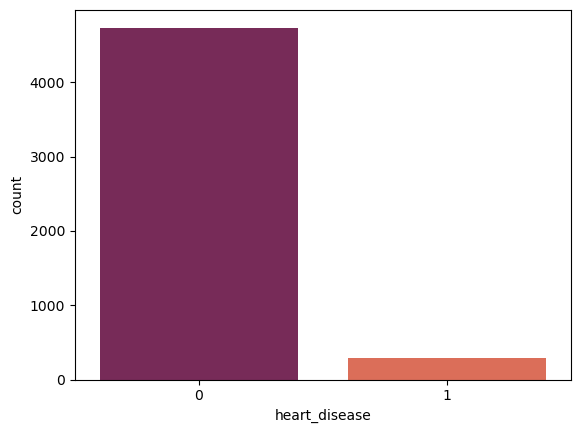

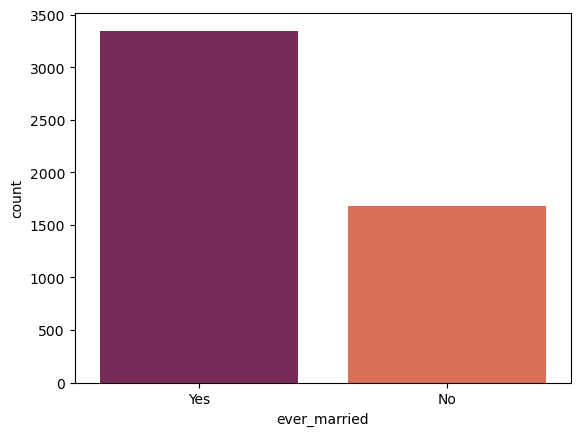

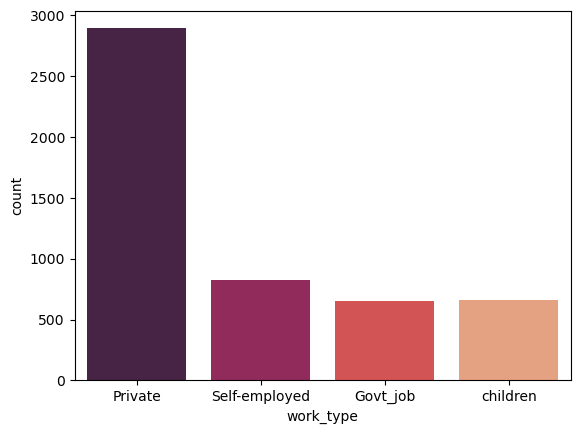

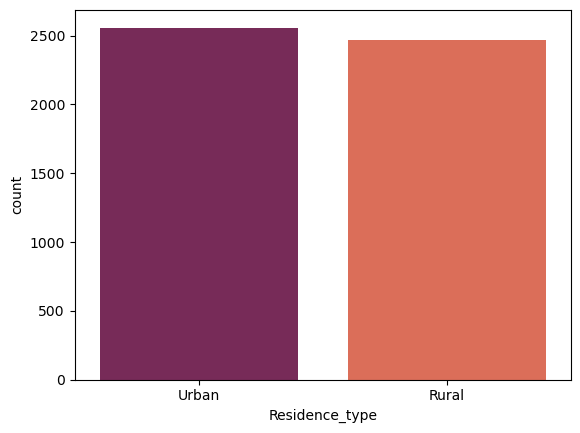

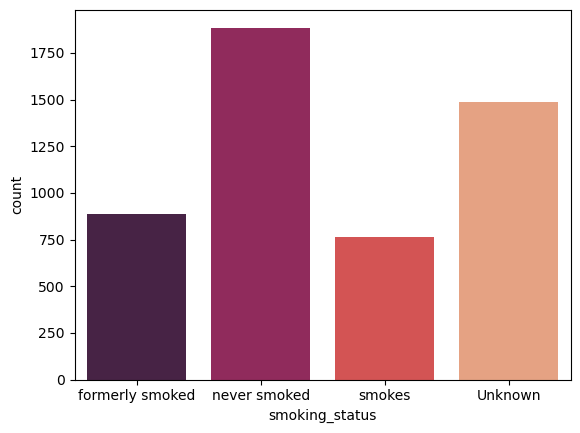

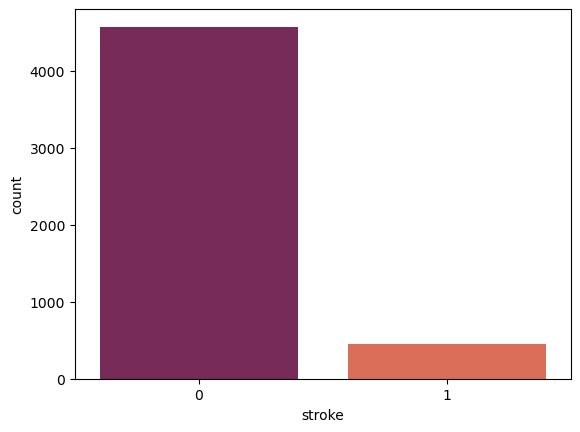

In [16]:
for i in brain_stroke.columns:
    if i == 'bmi' or i == 'age' or i == 'avg_glucose_level':
        continue
    else:
        seaborn.countplot(data=brain_stroke, x = i,palette = 'rocket')
        plt.show()
        print("\n")

## HistPlot

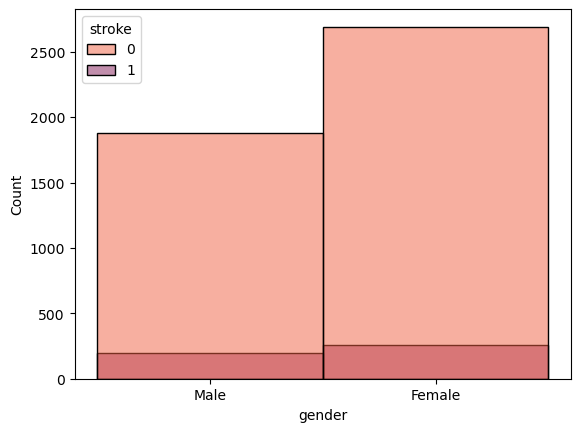

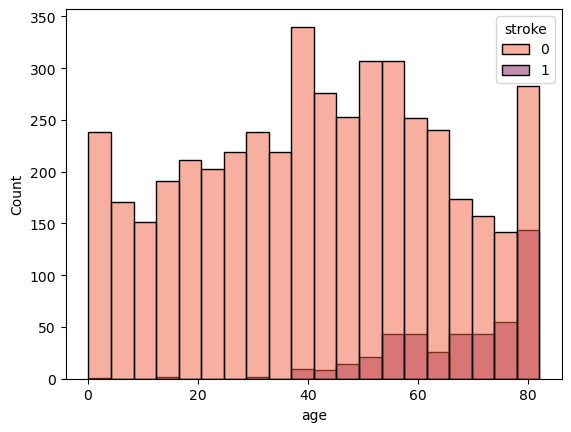

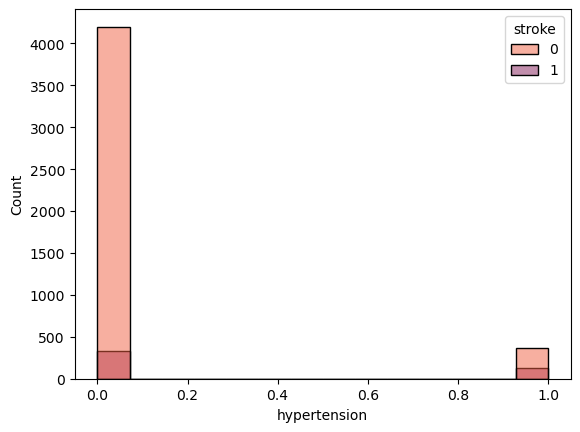

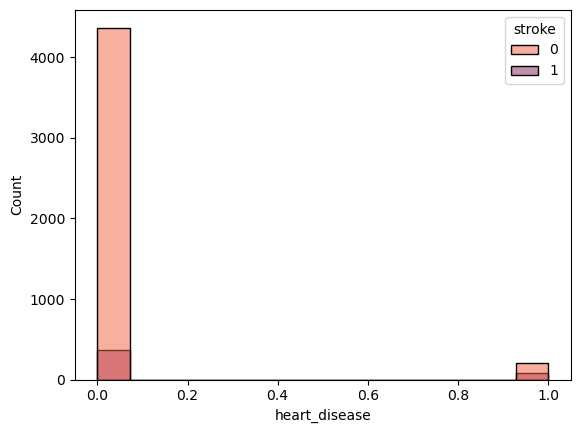

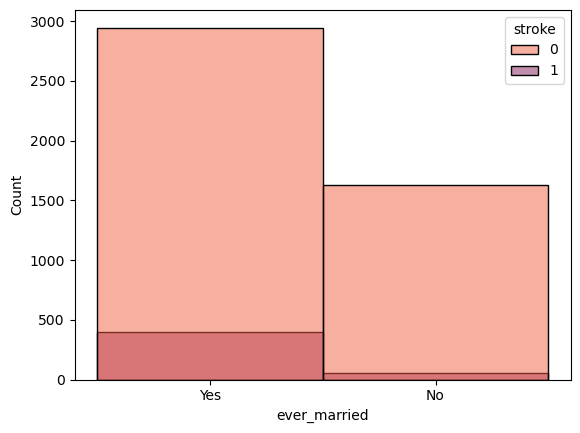

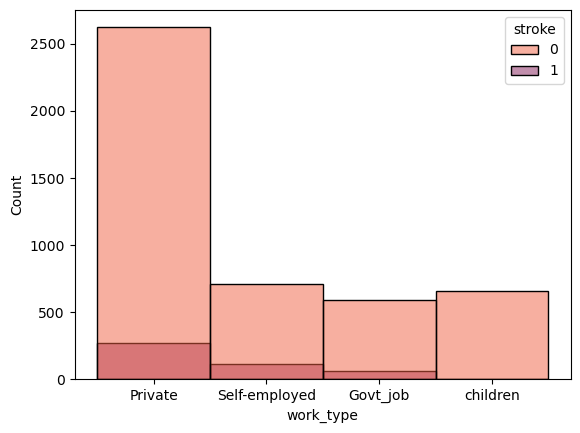

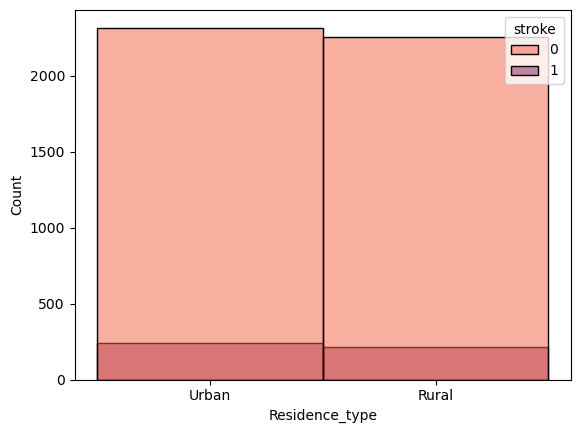

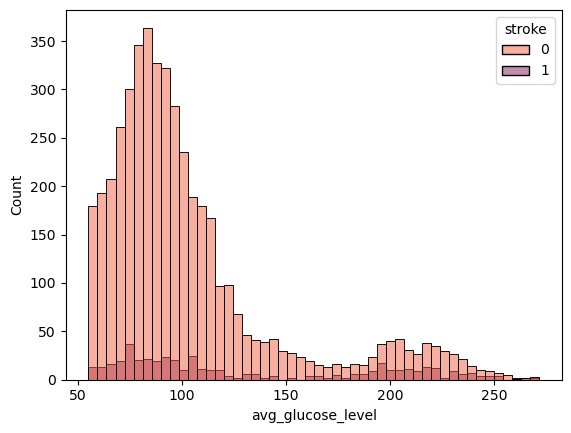

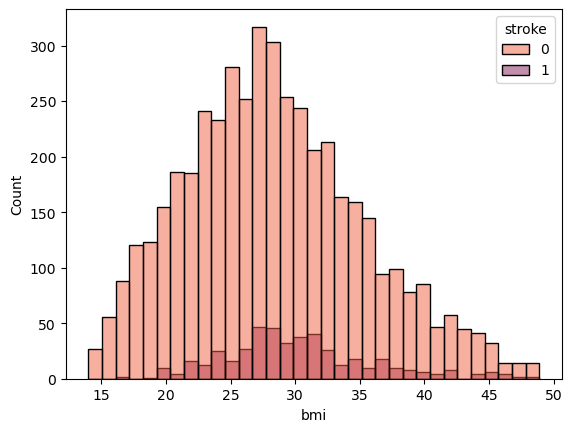

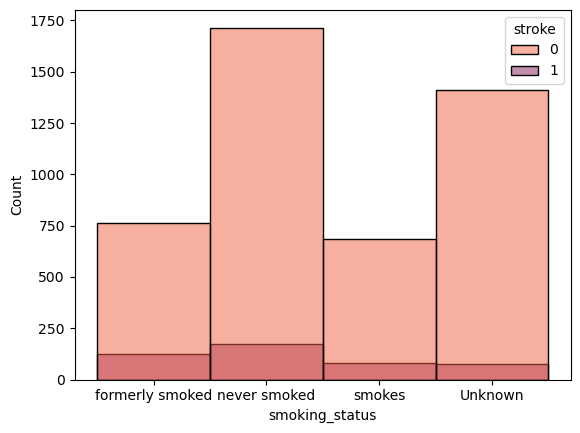

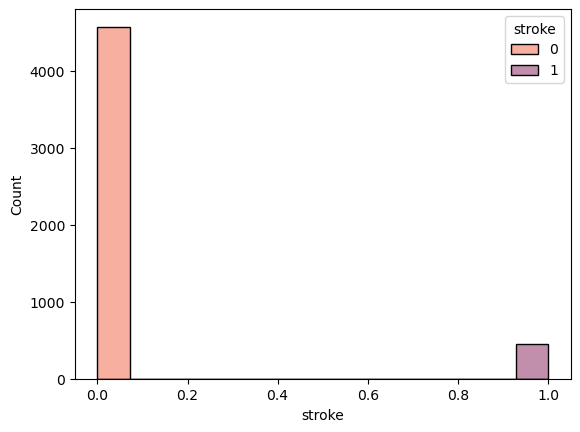

In [17]:
for i in brain_stroke.columns:
    seaborn.histplot(data=brain_stroke, x = i,hue = 'stroke',palette = 'rocket_r')
    plt.show()
    print("\n")

[week-05]

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
brain_stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
enc=LabelEncoder()

In [5]:
gender=enc.fit_transform(brain_stroke['gender'])
smoking_status=enc.fit_transform(brain_stroke['smoking_status'])
work_type=enc.fit_transform(brain_stroke['work_type'])
Residence_type=enc.fit_transform(brain_stroke['Residence_type'])
ever_married=enc.fit_transform(brain_stroke['ever_married'])

In [6]:
brain_stroke['work_type']=work_type
brain_stroke['ever_married']=ever_married
brain_stroke['Residence_type']=Residence_type
brain_stroke['smoking_status']=smoking_status
brain_stroke['gender']=gender

In [7]:
brain_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [18]:
brain_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

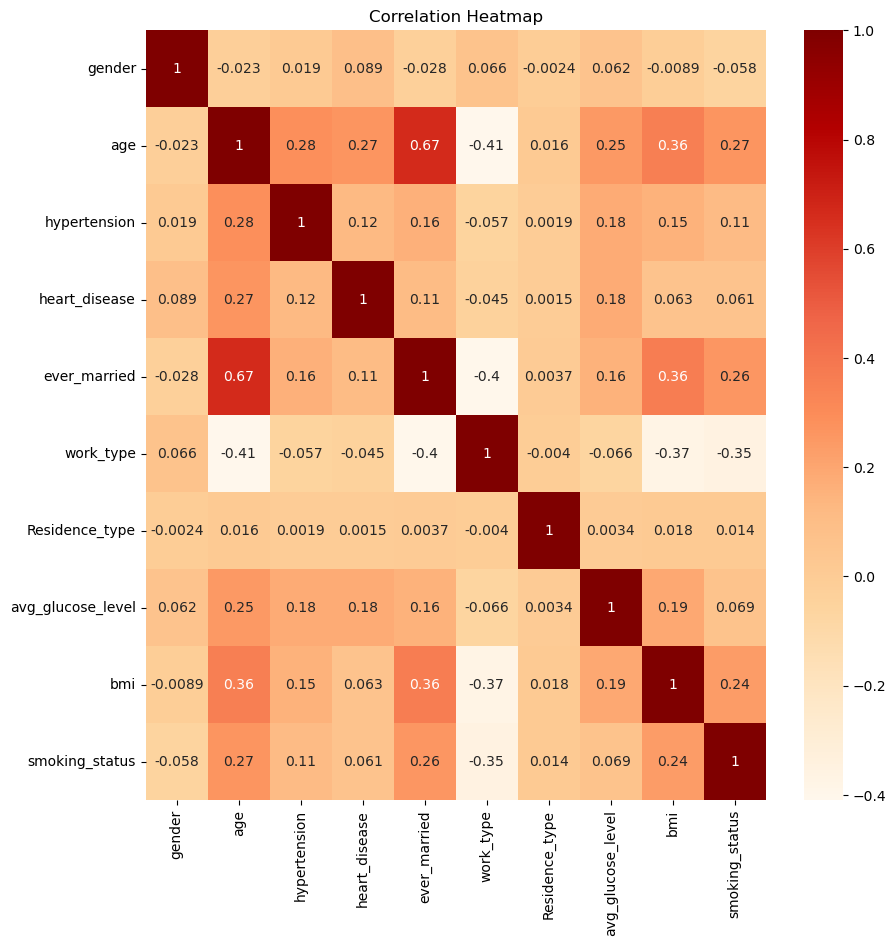

In [19]:
# Correlation Heatmap 
corr = brain_stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='OrRd')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X = brain_stroke.drop(columns = ['stroke'], axis=1)
Y = brain_stroke['stroke']

In [8]:
X.shape

(5026, 10)

In [22]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5021,0,68.0,1,1,1,1,1,247.52,40.5,1
5022,1,57.0,0,0,1,1,0,84.97,36.7,0
5023,0,14.0,0,0,0,3,0,57.94,30.9,0
5024,0,75.0,0,0,1,2,0,78.81,29.3,1


In [23]:
Y.shape

(5026,)

In [24]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5021    1
5022    1
5023    1
5024    1
5025    1
Name: stroke, Length: 5026, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 17)


In [10]:
print(X.shape, X_train.shape, X_test.shape)

(5026, 10) (4020, 10) (1006, 10)


In [11]:
print(Y.shape,Y_train.shape, Y_test.shape)

(5026,) (4020,) (1006,)


[Week-06]

<AxesSubplot: ylabel='stroke'>

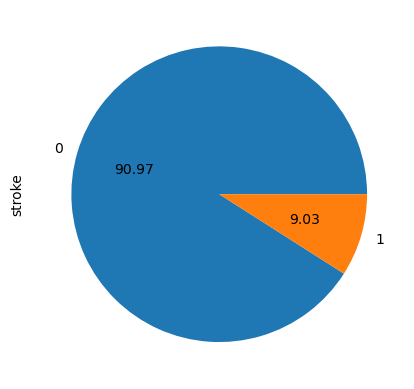

In [12]:
Y_train.value_counts().plot.pie(autopct='%.2f')

In [13]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [14]:
s=SMOTE()
X_balanced, Y_balanced = s.fit_resample(X_train, Y_train)

<AxesSubplot: ylabel='stroke'>

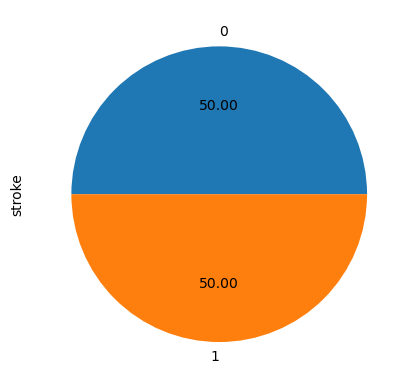

In [15]:
Y_balanced.value_counts().plot.pie(autopct='%.2f')

In [27]:
Y_train.value_counts()

0    3657
1     363
Name: stroke, dtype: int64

In [28]:
Y_balanced.value_counts()

0    3657
1    3657
Name: stroke, dtype: int64

# Model Training, Evaluation

In [15]:
# import libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Model-01 [KNN]

In [17]:
#Fit Train Data
model1 = KNeighborsClassifier()
model1.fit(X_balanced, Y_balanced)

KNeighborsClassifier()

In [18]:
#Train accuracy
Y_prd1_train = model1.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd1_train)*100)

Train accuracy: 87.86069651741293


In [19]:
#Test accuracy and classification report
Y_prd1 = model1.predict(X_test)
print(classification_report(Y_test,Y_prd1))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       915
           1       0.34      0.88      0.49        91

    accuracy                           0.83      1006
   macro avg       0.66      0.85      0.69      1006
weighted avg       0.93      0.83      0.86      1006



Text(0.5, 1.0, 'KNN')

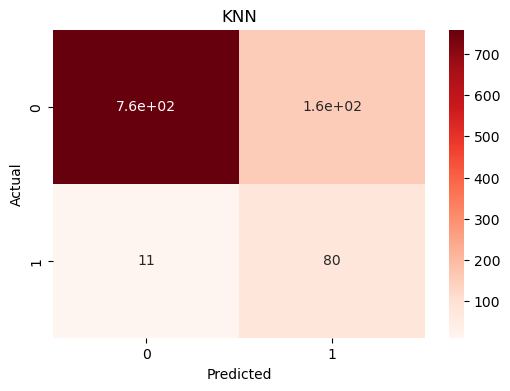

In [21]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd1)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("KNN")

# Model-02 [Decision Tree]

In [16]:
#Fit Train Data
model2 = DecisionTreeClassifier(max_depth=25)
model2.fit(X_balanced, Y_balanced)

DecisionTreeClassifier(max_depth=25)

In [57]:
#Train accuracy
Y_prd2_train = model2.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd2_train)*100)

Train accuracy: 100.0


In [27]:
#Test accuracy and classification report
Y_prd2 = model2.predict(X_test)
print(classification_report(Y_test,Y_prd2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       915
           1       0.46      0.79      0.59        91

    accuracy                           0.90      1006
   macro avg       0.72      0.85      0.76      1006
weighted avg       0.93      0.90      0.91      1006



Text(0.5, 1.0, 'DecisionTree')

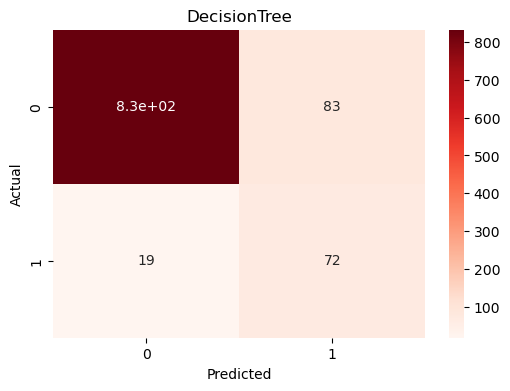

In [28]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd2)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("DecisionTree")

## Model-03 [RandomForest]

In [17]:
#Fit Train Data
model3 = RandomForestClassifier()
model3.fit(X_balanced, Y_balanced)

RandomForestClassifier()

In [30]:
#Train accuracy
Y_prd3_train = model3.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd3_train)*100)

Train accuracy: 99.97512437810944


In [31]:
#Test accuracy and classification report
Y_prd3 = model3.predict(X_test)
print(classification_report(Y_test,Y_prd3))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       915
           1       0.57      0.80      0.67        91

    accuracy                           0.93      1006
   macro avg       0.78      0.87      0.81      1006
weighted avg       0.94      0.93      0.93      1006



Text(0.5, 1.0, 'RandomForest')

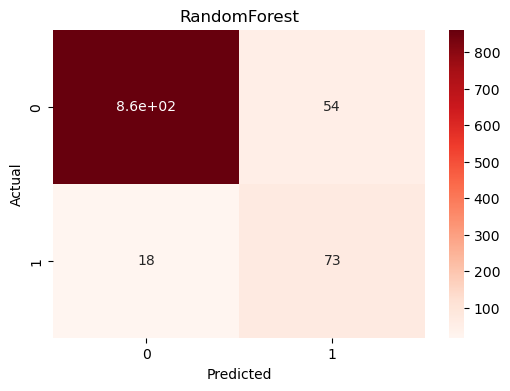

In [32]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd3)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("RandomForest")

## Model-04 [AdaBoostClassifier]

In [18]:
#Fit Train Data
model4 = AdaBoostClassifier()
model4.fit(X_balanced, Y_balanced)

AdaBoostClassifier()

In [35]:
#Train accuracy
Y_prd4_train = model4.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd4_train)*100)

Train accuracy: 77.7860696517413


In [36]:
#Test accuracy and classification report
Y_prd4 = model4.predict(X_test)
print(classification_report(Y_test,Y_prd4))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       915
           1       0.21      0.55      0.30        91

    accuracy                           0.77      1006
   macro avg       0.58      0.67      0.58      1006
weighted avg       0.88      0.77      0.81      1006



Text(0.5, 1.0, 'AdaBoostClassifier')

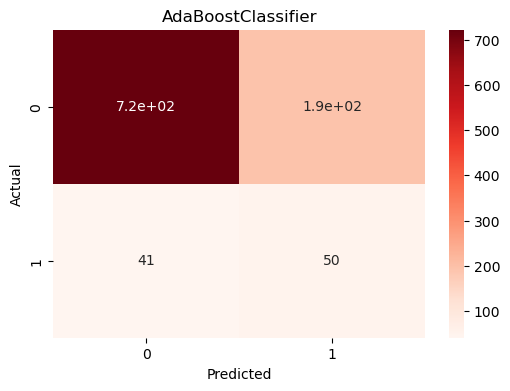

In [37]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd4)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("AdaBoostClassifier")

## Model-05 [GradientBoostingClassifier]

In [19]:
#Fit Train Data
model5=GradientBoostingClassifier(max_depth=12,n_estimators=85,learning_rate=0.9)
model5.fit(X_balanced, Y_balanced)

GradientBoostingClassifier(learning_rate=0.9, max_depth=12, n_estimators=85)

In [39]:
#Train accuracy
Y_prd5_train = model5.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd5_train)*100)

Train accuracy: 100.0


In [40]:
#Test accuracy and classification report
Y_prd5 = model5.predict(X_test)
print(classification_report(Y_test,Y_prd5))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       915
           1       0.70      0.78      0.74        91

    accuracy                           0.95      1006
   macro avg       0.84      0.87      0.85      1006
weighted avg       0.95      0.95      0.95      1006



Text(0.5, 1.0, 'GradientBoostingClassifier')

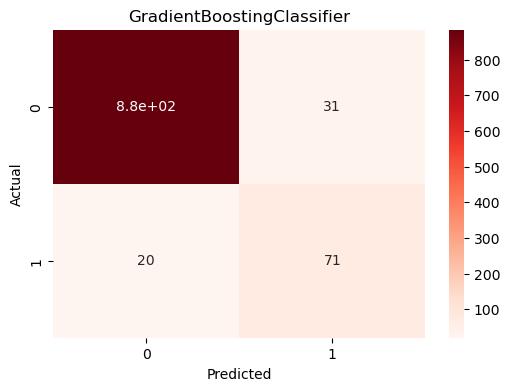

In [41]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd5)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("GradientBoostingClassifier")

## Model-06 [AdaBoost with RandomForest]

In [20]:
#Fit Train Data
model6=AdaBoostClassifier(n_estimators=80, estimator=model3, learning_rate=0.9)
model6.fit(X_balanced, Y_balanced)

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=0.9,
                   n_estimators=80)

In [43]:
#Train accuracy
Y_prd6_train = model5.predict(X_train)
print("Train accuracy:",accuracy_score(Y_train,Y_prd5_train)*100)

Train accuracy: 100.0


In [44]:
#Test accuracy and classification report
Y_prd6 = model6.predict(X_test)
print(classification_report(Y_test,Y_prd6))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       915
           1       0.58      0.80      0.68        91

    accuracy                           0.93      1006
   macro avg       0.78      0.87      0.82      1006
weighted avg       0.94      0.93      0.94      1006



Text(0.5, 1.0, 'AdaBoost_RF')

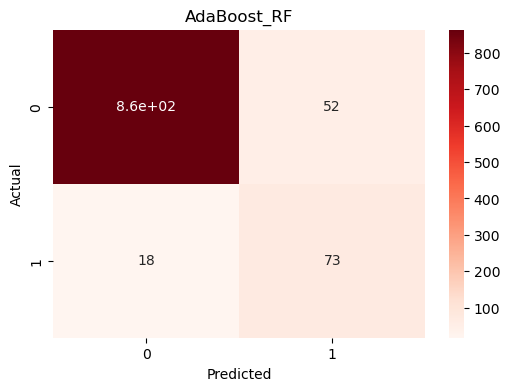

In [45]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_prd6)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("AdaBoost_RF")

## Accuracy comparison

In [46]:
ac1=accuracy_score(Y_test,Y_prd1)
ac2=accuracy_score(Y_test,Y_prd2)
ac3=accuracy_score(Y_test,Y_prd3)
ac4=accuracy_score(Y_test,Y_prd4)
ac5=accuracy_score(Y_test,Y_prd5)
ac6=accuracy_score(Y_test,Y_prd6)

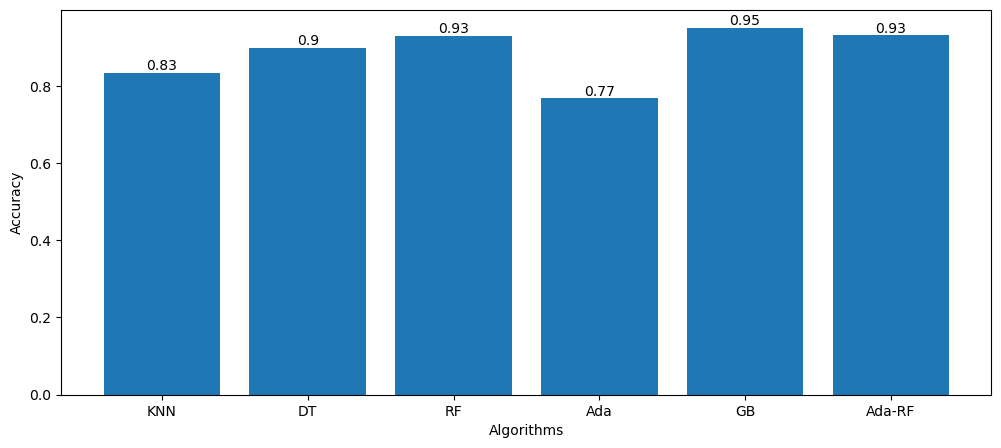

In [55]:
accuracy_scores = [ac1, ac2, ac3, ac4, ac5, ac6]
algorithms = ['KNN', 'DT', 'RF', 'Ada', 'GB', 'Ada-RF']

plt.rcParams['figure.figsize'] = (12, 5)
bars = plt.bar(algorithms, accuracy_scores)

# Add text labels on top of each bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()


## Saving The Trained Model

Wanted to use pickle But my pickel5 doesn't work with python

In [21]:
import joblib

In [22]:
joblib.dump(model5,'model_gb')

['model_gb']